# SVM 분류 - 피마 인디언 당뇨병 데이터 셋

> 주의! 분석 시간이 오래 소요됨

## #01. 준비작업

### [1] 패키지 가져오기

In [1]:
import warnings
warnings.filterwarnings(action='ignore')

# Intel SKlearn 하드웨어 가속 패치 설정
import sys
if sys.platform == 'win32':
    from sklearnex import patch_sklearn
    patch_sklearn()

from hossam.util import *
from hossam.plot import *
from hossam.analysis import *
from hossam.classification import *

### [2] 데이터 가져오기

In [2]:
origin = my_read_excel("https://data.hossam.kr/mldata/pima_indians_diabetes.xlsx", categories=['Outcome'], info=False)

## #02. 데이터 전처리

### [1] 이전 예제에서 수립한 전처리 전략 재현

1. `0`값을 포함해서는 안되는 변수에 대해 평균으로 대체



In [3]:
# 정제 대상 필드명
zero_features = ['Glucose', 'BloodPressure','SkinThickness','Insulin','BMI']

# `0`값을 결측치로 대체후 평균으로 다시 치환
df = origin.copy()
df[zero_features] = df[zero_features].replace(0, np.nan)
df2 = my_replace_missing_value(df)

## #03. SVM 분류 적용

### [1] 훈련, 검증 데이터 분리

In [4]:
df2['Outcome'] = df2['Outcome'].astype('int')

x_train, x_test, y_train, y_test = my_train_test_split(df2, yname='Outcome', test_size=0.2, scalling=False)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((614, 8), (154, 8), (614,), (154,))

### [2] 분류 알고리즘 적용

SVC의 random_state 설정됨
SVC {'C': [0.1, 1, 10], 'kernel': ['rbf', 'poly', 'sigmoid'], 'degree': [2, 3, 4, 5]}
[교차검증 TOP5]
+----+----------+----------+-----+-------------------+
|    | kernel   |   degree |   C |   mean_test_score |
|----+----------+----------+-----+-------------------|
| 25 | poly     |        2 |  10 |          0.770412 |
| 13 | poly     |        2 |   1 |          0.763894 |
| 27 | rbf      |        3 |  10 |          0.759003 |
| 33 | rbf      |        5 |  10 |          0.759003 |
| 24 | rbf      |        2 |  10 |          0.759003 |
+----+----------+----------+-----+-------------------+

[Best Params]
{'kernel': 'poly', 'degree': 2, 'C': 10}

[분류분석 성능평가]
+-------------------+--------------+--------------+-----------------------------------------------------------+
|                   |   훈련데이터 |   검증데이터 | 설명                                                      |
|-------------------+--------------+--------------+-----------------------------------------------------

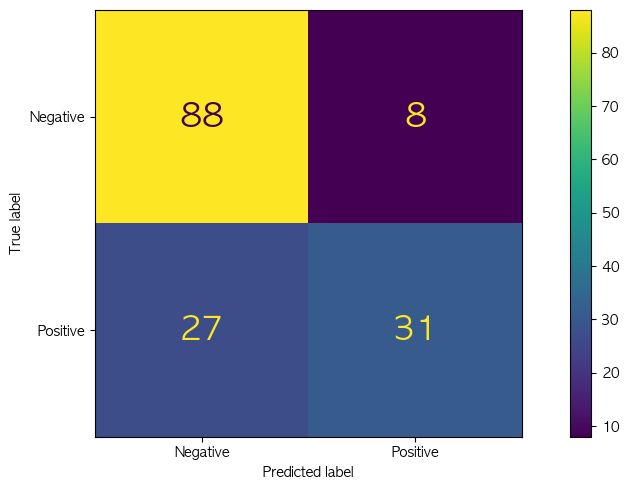


[학습곡선]


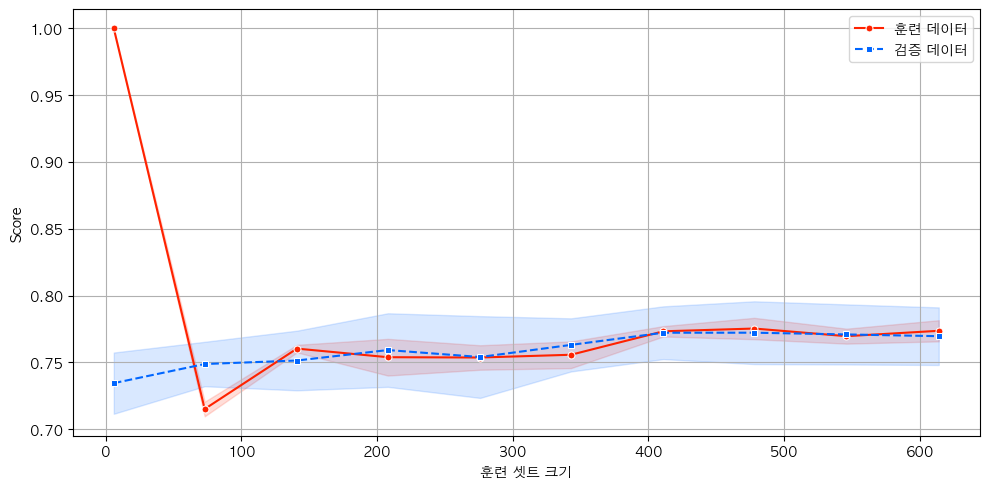

+----+------------+--------------------------+---------+
|    | 종속변수   | 독립변수                 |     VIF |
|----+------------+--------------------------+---------|
|  0 | Outcome    | Pregnancies              | 3.66652 |
|  1 | Outcome    | Glucose                  | 20.9629 |
|  2 | Outcome    | BloodPressure            | 29.8346 |
|  3 | Outcome    | SkinThickness            | 12.6338 |
|  4 | Outcome    | Insulin                  | 4.90468 |
|  5 | Outcome    | BMI                      | 31.9305 |
|  6 | Outcome    | DiabetesPedigreeFunction | 3.15613 |
|  7 | Outcome    | Age                      | 15.4882 |
+----+------------+--------------------------+---------+
CPU times: user 992 ms, sys: 1.65 s, total: 2.64 s
Wall time: 1.85 s


SVC(C=10, degree=2, kernel='poly', random_state=1234)

In [5]:
%%time
my_svc_classification(x_train, y_train, x_test, y_test)